# Mask RCNN for elephant:

https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/

### Load Model and Make Prediction

In [1]:
#############################################################
#####example of inference with a pre-trained coco model######
#############################################################
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
from pycocotools.coco import COCO
import coco

%matplotlib inline 

Using TensorFlow backend.


In [2]:
# define the test configuration
class TestConfig(Config):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

config = TestConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

We can now define the MaskRCNN instance.

In [12]:
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

Type “inference” indicating that we are interested in making predictions and not training. 

In [3]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
# load photograph
img = load_img('elephant.jpg')
img = img_to_array(img)

We can then make a prediction with the model. Instead of calling predict() as we would on a normal Keras model, will call the detect() function and pass it the single image.

In [5]:
# make prediction
results = model.detect([img], verbose=0)

The result contains a dictionary for each image that we passed into the detect() function, in this case, a list of a single dictionary for the one image.

The dictionary has keys for the bounding boxes, masks, and so on, and each key points to a list for multiple possible objects detected in the image.

The keys of the dictionary of note are as follows:

>‘rois‘: The bound boxes or regions-of-interest (ROI) for detected objects.

>‘masks‘: The masks for the detected objects.

>‘class_ids‘: The class integers for the detected objects.

>‘scores‘: The probability or confidence for each predicted class.

In [6]:
print(results)

[{'rois': array([[ 30,  54, 360, 586]]), 'class_ids': array([21]), 'scores': array([0.999938], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])}]


In [7]:
boxes = results[0]['rois'] #We can draw each box detected in the image

Each bounding box is defined in terms of the bottom left and top right coordinates of the bounding box in the image

In [9]:
# get coordinates
y1, x1, y2, x2 = boxes[0]
# calculate width and height of the box
width, height = x2 - x1, y2 - y1
# create the shape
rect = Rectangle((x1, y1), width, height, fill=False, color='red') #Using matplotlib API
# draw the box
ax.add_patch(rect)

NameError: name 'ax' is not defined

We can create a function to do this that will take the filename of the photograph and the list of bounding boxes to draw and will show the photo with the boxes.

In [10]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

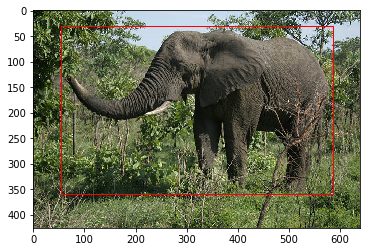

In [11]:
draw_image_with_boxes('elephant.jpg', boxes)

##### Prueba con muestra de polen (sin entrenar pretrain coco_model)

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  190.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   85.33437  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[{'rois': array([[ 377, 1689,  701, 1914]]), 'class_ids': array([30]), 'scores': array([0.9725758], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [

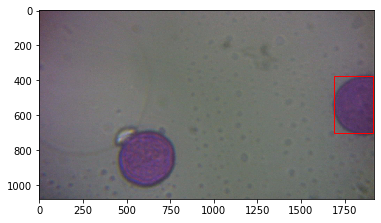

In [14]:
# load photograph
img = load_img('Muestra1.jpg')
img = img_to_array(img)
# make prediction
results = model.detect([img], verbose=1)
print(results)
boxes = results[0]['rois'] #We can draw each box detected in the image
draw_image_with_boxes('Muestra1.jpg', boxes)

In [20]:
print(results[0]['rois'])

[[ 377 1689  701 1914]]


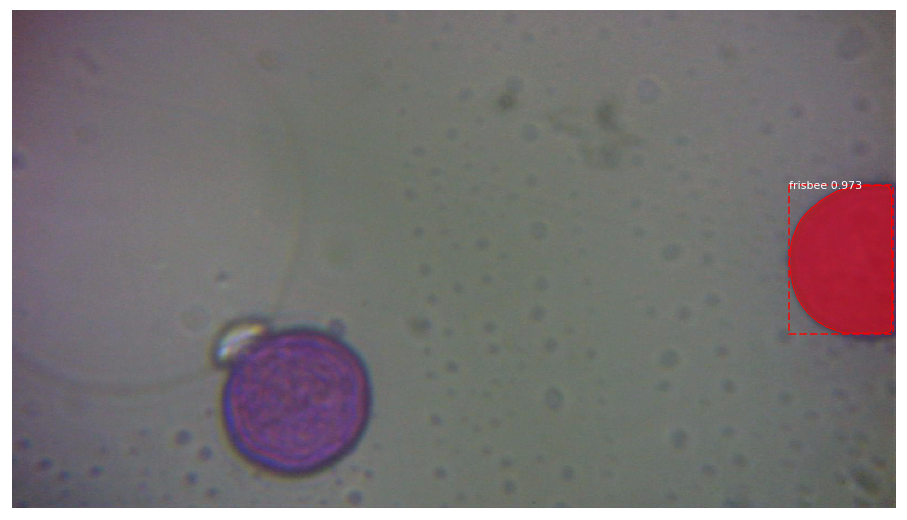

In [28]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])